In [61]:
from glob import glob
from fitsio import FITS

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic_2d

from cycler import cycler
plt.rcParams.update({
    'figure.figsize'   : (12, 10),
    'font.family'      :'serif',
    'font.size'        : 28,
    'font.serif'       :'Georgia',
    'axes.labelsize'   :'large',
    'mathtext.fontset' :'stix',
    'axes.linewidth'   : 5,
    'xtick.direction'  :'in',
    'ytick.direction'  :'in',
    'xtick.major.size' : 7,
    'ytick.major.size' : 7,
    'xtick.major.width': 3,
    'ytick.major.width': 3,
    'xtick.minor.size' : 5,
    'ytick.minor.size' : 5,
    'xtick.minor.width': 2,
    'ytick.minor.width': 2,
    'lines.linewidth'  : 3,
    'axes.prop_cycle'  : cycler('color', ['red', 'orange', 'teal', 'skyblue']),
})

In [13]:
tiles = glob('/data2/lsajkov/mpdg/data/KiDS_multiband/KiDS_DR4.0_*_*_ugriZYJHKs_cat.fits')

In [19]:
tiles[0].split('_')[-4:-2]

['229.0', '-0.5']

In [26]:
galaxy_catalog_path = '/data2/lsajkov/mpdg/data_products/KiDS/SOM/KiDS_SOM_panchrom_07Aug24.fits'
galaxy_catalog = FITS(galaxy_catalog_path)[1]

def randoms_catalogs_path(i): return f'/data2/lsajkov/mpdg/data_products/KiDS_randoms/randoms_in_KiDS_{i}.fits'
randoms1 = FITS(randoms_catalogs_path(1))[0]
randoms2 = FITS(randoms_catalogs_path(2))[0]
randoms3 = FITS(randoms_catalogs_path(3))[0]
randoms4 = FITS(randoms_catalogs_path(4))[0]
randoms5 = FITS(randoms_catalogs_path(5))[0]

In [27]:
tile_idx = np.random.randint(0, len(tiles))
tile_cent_ra, tile_cent_dec = tiles[tile_idx].split('_')[-4:-2]
tile_cent_ra = float(tile_cent_ra); tile_cent_dec = float(tile_cent_dec)

In [28]:
galaxy_radec_idx = (galaxy_catalog['ra'][:] > tile_cent_ra - 0.5) & (galaxy_catalog['ra'][:] < tile_cent_ra + 0.5) &\
                   (galaxy_catalog['dec'][:] > tile_cent_dec - 0.5) & (galaxy_catalog['dec'][:] < tile_cent_dec + 0.5)

In [29]:
galaxy_catalog_idx = np.arange(0, galaxy_catalog.get_nrows())[galaxy_radec_idx]
galaxy_catalog_selected = galaxy_catalog[galaxy_catalog_idx]

In [43]:
binned_stats = binned_statistic_2d(galaxy_catalog_selected['ra'][:],
                                   galaxy_catalog_selected['dec'][:],
                                   galaxy_catalog_selected['r_mag'][:], statistic = 'median',
                                   bins = 50)

In [57]:


nrows = 2
ncols = 2

saved_maps   = np.empty((nrows, ncols), dtype = object)
saved_coords = np.empty((nrows, ncols), dtype = object)

for i in range(nrows):
    for j in range(ncols):

        tile_idx = np.random.randint(0, len(tiles))
        tile_cent_ra, tile_cent_dec = tiles[tile_idx].split('_')[-4:-2]
        tile_cent_ra = float(tile_cent_ra); tile_cent_dec = float(tile_cent_dec)

        galaxy_radec_idx = (galaxy_catalog['ra'][:] > tile_cent_ra - 0.5) & (galaxy_catalog['ra'][:] < tile_cent_ra + 0.5) &\
                           (galaxy_catalog['dec'][:] > tile_cent_dec - 0.5) & (galaxy_catalog['dec'][:] < tile_cent_dec + 0.5)

        galaxy_catalog_idx = np.arange(0, galaxy_catalog.get_nrows())[galaxy_radec_idx]
        galaxy_catalog_selected = galaxy_catalog[galaxy_catalog_idx]

        saved_coords[i, j] = (tile_cent_ra, tile_cent_dec)
        saved_maps[i, j]  = binned_statistic_2d(galaxy_catalog_selected['ra'][:],
                                                galaxy_catalog_selected['dec'][:],
                                                galaxy_catalog_selected['r_mag'][:], statistic = 'median',
                                                bins = 50)


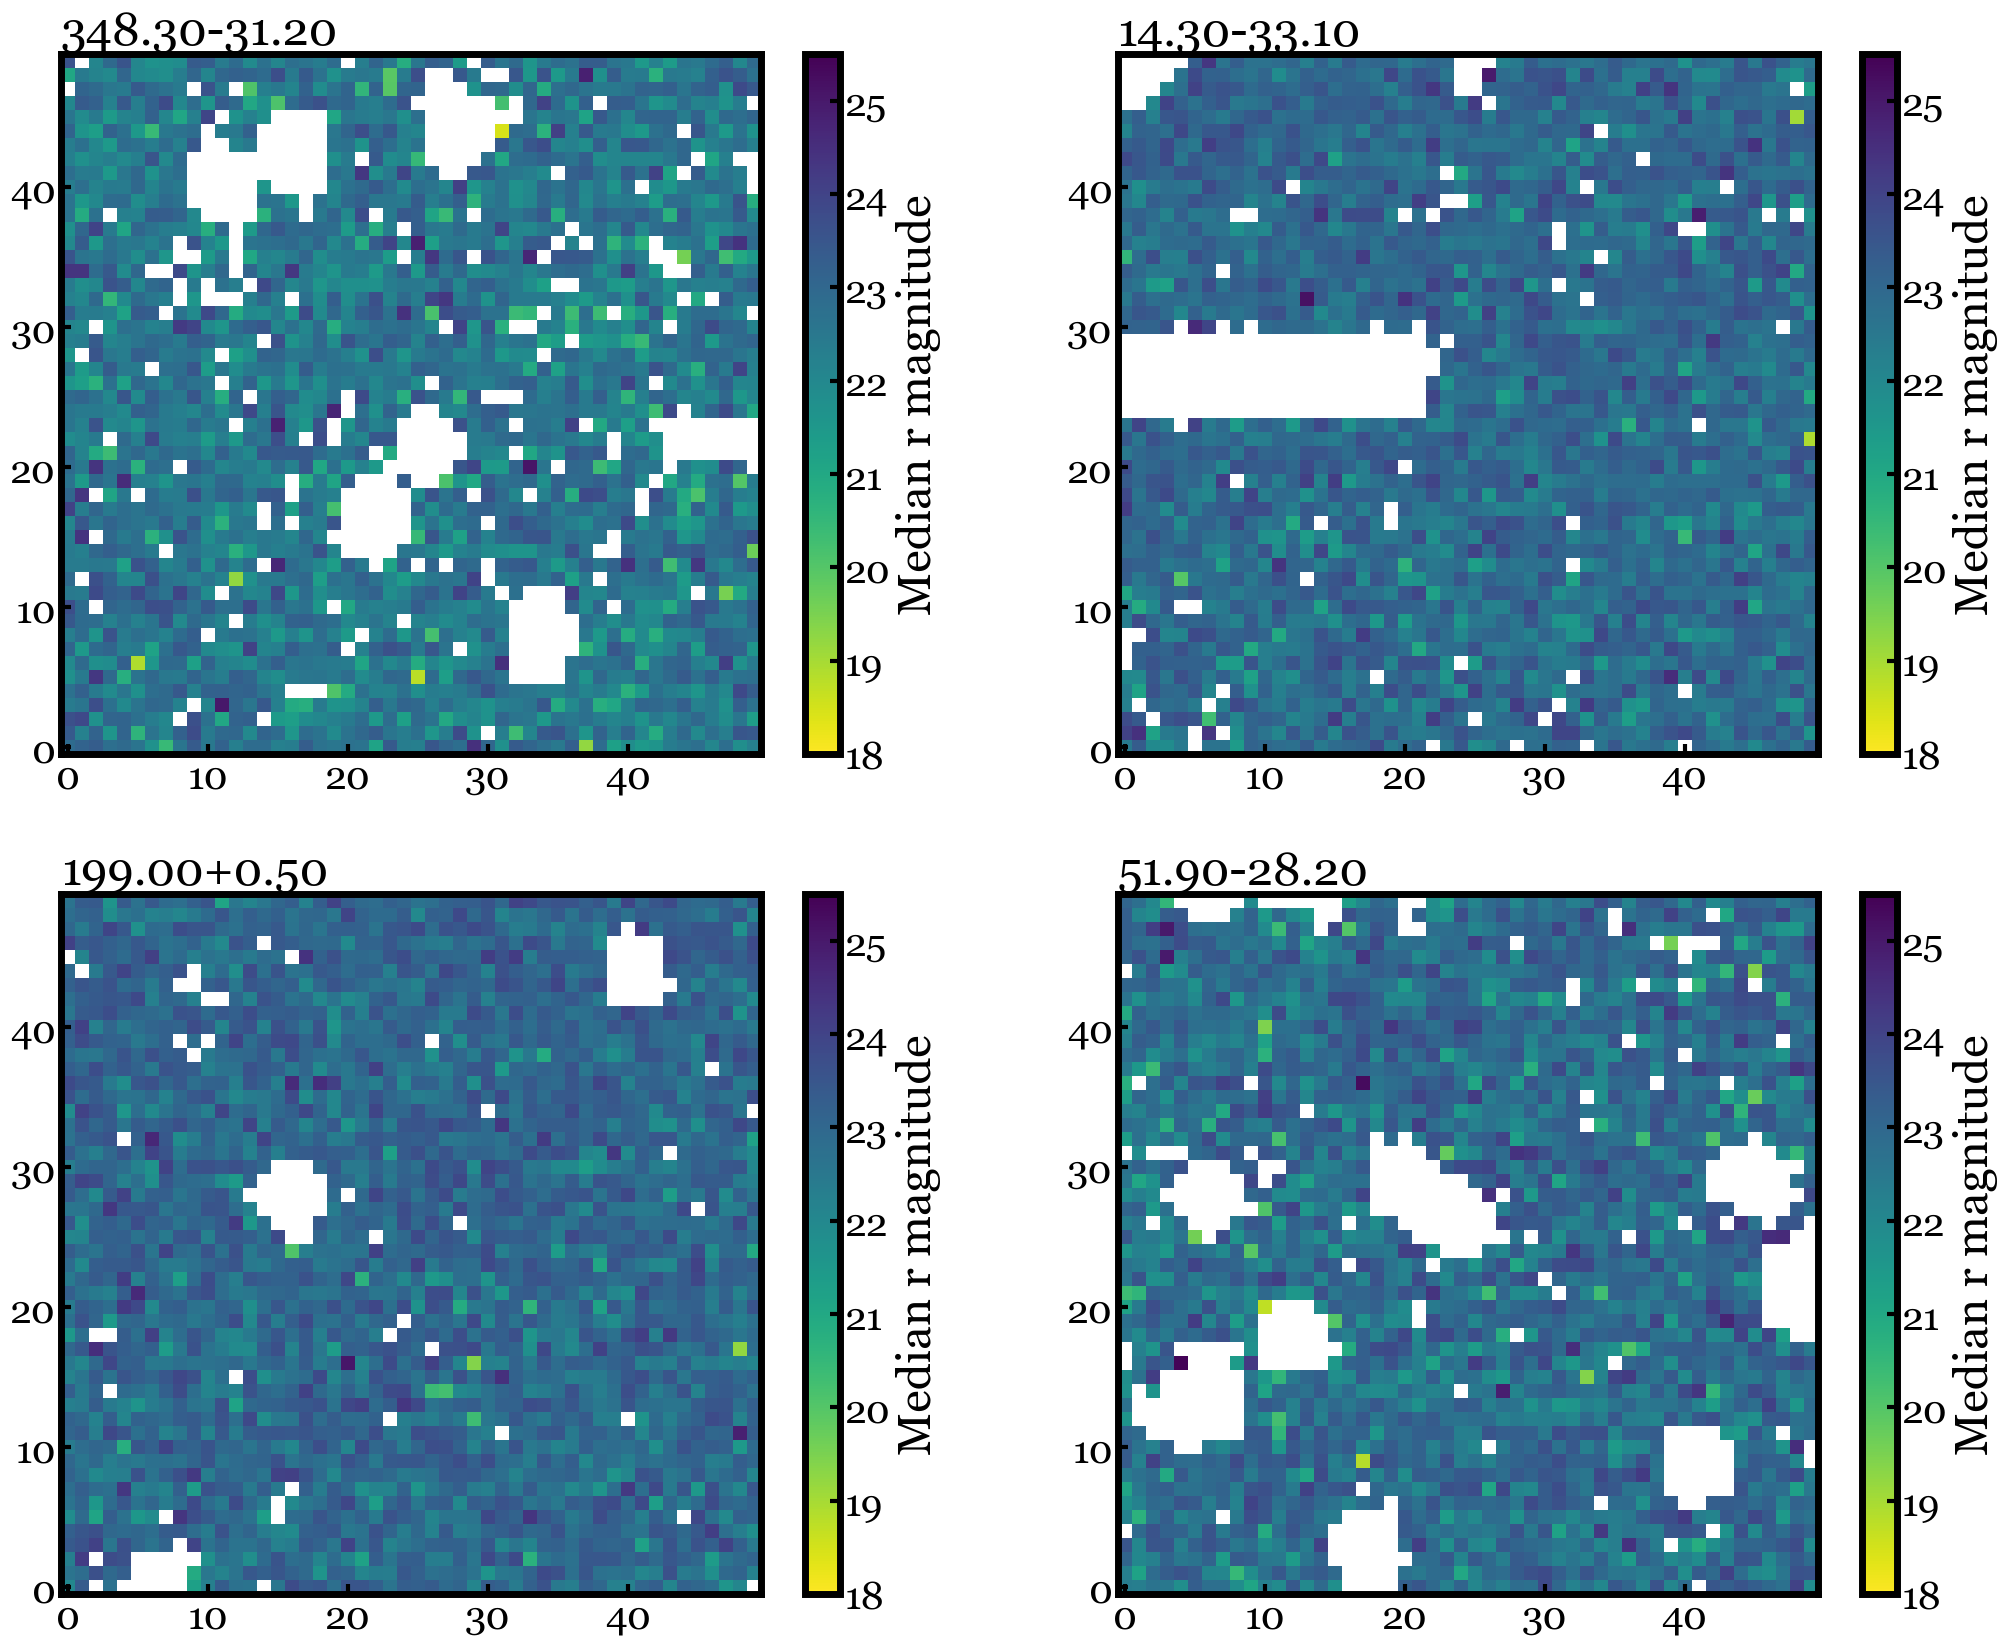

In [81]:
fig = plt.figure(figsize = (25, 20))

for i in range(nrows):
    for j in range(ncols):

        ax = fig.add_subplot(nrows, ncols, i + ncols*j + 1)

        map = ax.imshow(saved_maps[i, j][0], origin = 'lower', cmap = 'viridis_r',
                        vmin = 18, vmax = 25.5)
        ax.set_title(f'{saved_coords[i, j][0]:.2f}{saved_coords[i, j][1]:+.2f}',
                     loc = 'left')
        fig.colorbar(mappable = map, ax = ax,
                     label = 'Median r magnitude')
        